- Load datafile and data dictionary to dataframe
- Loading data dictionary as we may remove columns,it is easier to 
  get the list of remaining ones programattically.

Dataframes:<br>
LC - for lending club data<br>
DD - for data dictionary

In [1]:
import pandas as pd

LC = pd.read_csv("loan.csv", encoding="UTF-8",low_memory=False)
DD = pd.read_csv("LoanStats.csv", encoding="UTF-8",low_memory=False)

- Cleanup data dictionay frame to ensure only relevant rows are present

 - Remove null rows
 - Remove rows where field name is null

Expecting the shape to be 115X2 after cleanup

In [2]:
DD=DD.loc[:,DD.isnull().sum()<100]
DD=DD.rename(columns={"LoanStatNew":"param_name"})
DD=DD.loc[~DD["param_name"].isnull()]
DD.shape

(115, 2)

### Cleanup lending club data

- Check for columns with all NaN values

In [3]:
LCN=LC.isnull().sum().reset_index()
LCN=LCN.rename(columns={0:"nancount"})
LCN.loc[LCN["nancount"]==LC["id"].count()]

,index,nancount
50,mths_since_last_major_derog,39717
53,annual_inc_joint,39717
54,dti_joint,39717
55,verification_status_joint,39717
57,tot_coll_amt,39717
58,tot_cur_bal,39717
59,open_acc_6m,39717
60,open_il_6m,39717
61,open_il_12m,39717
62,open_il_24m,39717


- Remove columns where we have all NaN values

In [4]:
LC=LC.loc[:,LC.isnull().sum()<len(LC.index)]

In [5]:
LC.shape

(39717, 57)

- Check for columns with more than 50% NaN values

In [6]:
LCN=LC.isnull().sum().reset_index()
LCN=LCN.rename(columns={0:"nancount"})
LCN.loc[LCN["nancount"]>len(LC.index)*0.5]

,index,nancount
28,mths_since_last_delinq,25682
29,mths_since_last_record,36931
47,next_pymnt_d,38577


- Get more details about mths_since_last_delinq to see if it would be useful
 - Check if we have enough non null values that may be useful

In [7]:
LC.loc[~LC["mths_since_last_delinq"].isnull()].groupby("loan_status")["id"].count()

loan_status
Charged Off     2142
Current          363
Fully Paid     11530
Name: id, dtype: int64

- Let's see if we many records we have for each loan status

In [8]:
LC.groupby(["loan_status"]).count()["id"].sort_values(ascending=False)

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: id, dtype: int64

Will keep mths_since_last_delinq for now.
- Drop mths_since_last_record,next_pymnt_d since they have too many null values

In [9]:
LC=LC.drop(columns=["mths_since_last_record","next_pymnt_d"])

In [10]:
LC.shape

(39717, 55)

- purpose and title look similar, purpose seem well defined

In [11]:
LC[["purpose", "title"]]

,purpose,title
0,credit_card,Computer
1,car,bike
2,small_business,real estate business
3,other,personel
4,other,Personal
...,...,...
39712,home_improvement,Home Improvement
39713,credit_card,Retiring credit card debt
39714,debt_consolidation,MBA Loan Consolidation
39715,other,JAL Loan


- Drop "title" column

In [12]:
LC=LC.drop(columns=["title"])

- Check values we have in column initial_list_status

In [13]:
LC.groupby("initial_list_status").count().reset_index()["id"]

0    39717
Name: id, dtype: int64

- Drop initial_list_status as it is all zeros

In [14]:
LC=LC.drop(columns=["initial_list_status"])

- Check values in column "desc"

In [15]:
LC["desc"]

0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
2                                                      NaN
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
                               ...                        
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                                  NaN
39715                                                  NaN
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 39717, dtype: object

- Too descriptive, hard to glean any useful data, drop column "desc"

In [16]:
LC=LC.drop(columns=["desc"])

- Check values in column "pymnt_plan"

In [17]:
LC.groupby("pymnt_plan").count().reset_index()["id"]

0    39717
Name: id, dtype: int64

- Check if url is useful as we already have a "id" column

In [18]:
LC["urlid"] = pd.to_numeric(LC["url"].str.split("=").str[-1])

LC.loc[LC["id"]!=LC["urlid"]][["id","urlid"]]

,id,urlid


- Drop url and pyment_plan columns as it doesn't have useful info

In [19]:
LC=LC.drop(columns=["url","urlid","pymnt_plan"])

- Check remaining null values

In [20]:
LCN=LC.isnull().sum().reset_index()
LCN=LCN.rename(columns={0:"nancount"})
LCN.loc[LCN["nancount"]>0]

,index,nancount
10,emp_title,2459
11,emp_length,1075
24,mths_since_last_delinq,25682
28,revol_util,50
39,last_pymnt_d,71
41,last_credit_pull_d,2
42,collections_12_mths_ex_med,56
46,chargeoff_within_12_mths,56
48,pub_rec_bankruptcies,697
49,tax_liens,39


- Check for tax_liens column, drop if not useful

In [21]:
LC.groupby("tax_liens").count()["id"]

tax_liens
0.0    39678
Name: id, dtype: int64

In [22]:
LC=LC.drop(columns=["tax_liens"])

- Do the same for collections_12_mths_ex_med

In [23]:
LC.groupby("collections_12_mths_ex_med").count()["id"]

collections_12_mths_ex_med
0.0    39661
Name: id, dtype: int64

In [24]:
LC=LC.drop(columns=["collections_12_mths_ex_med"])

- Do the same for chargeoff_within_12_mths

In [25]:
LC.groupby("chargeoff_within_12_mths").count()["id"]

chargeoff_within_12_mths
0.0    39661
Name: id, dtype: int64

In [26]:
LC=LC.drop(columns=["chargeoff_within_12_mths"])

- both id and member_id are unique values, we need only one, so, drop member_id

In [27]:
LC.groupby("member_id").count().shape

(39717, 46)

In [28]:
LC=LC.drop(columns=["member_id"])

- Check for column last_credit_pull_d, we are not imputing any value, will do it if it is useful later

In [29]:
LC.groupby("last_credit_pull_d").count()["id"].sum()

39715

- impute a string to NaN values in emp_title

In [30]:
import numpy as np
LC["emp_title"]=LC["emp_title"].replace(np.nan, "not available")

- Convert int_rate to a number as we need it for calculations

In [31]:
LC["int_rate"]=pd.to_numeric(LC["int_rate"].str.rstrip('%'))

- Check if delinq_amnt has useful values, drop if doesn't have

In [32]:
LC.loc[LC["delinq_amnt"]!=0]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies


In [33]:
LC=LC.drop(columns=["delinq_amnt"])

- Convert emplength to number, ">10" will be 11, <1 would be 0.
- Since these are not taken as exact values, we need a vlue for ordering them correctly

In [34]:
LC["emp_length"]=LC["emp_length"].str.strip("years").str.strip("year").str.replace("10\+","11").str.replace("< 1","0")

In [35]:
LC["emp_length"]=pd.to_numeric(LC["emp_length"])

- Get a list of columns with NaN at this point

In [36]:
LCN=LC.isnull().sum().reset_index()
LCN=LCN.rename(columns={0:"nancount"})
LCN.loc[LCN["nancount"]>0]

,index,nancount
10,emp_length,1075
23,mths_since_last_delinq,25682
27,revol_util,50
38,last_pymnt_d,71
40,last_credit_pull_d,2
44,pub_rec_bankruptcies,697


- Impute median value for missing emp_length columns

In [37]:
LC["emp_length"].loc[LC["emp_length"].isnull()]=LC["emp_length"].median()

/Users/muraleets/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


- Get a list of columns with NaN values, these will be dealt with later, if required

In [38]:
LCN=LC.isnull().sum().reset_index()
LCN=LCN.rename(columns={0:"nancount"})
LCN.loc[LCN["nancount"]>0]

,index,nancount
23,mths_since_last_delinq,25682
27,revol_util,50
38,last_pymnt_d,71
40,last_credit_pull_d,2
44,pub_rec_bankruptcies,697


- Convert date columns to datetime datatype

In [39]:
LC["issue_d"]=pd.to_datetime(LC["issue_d"],format="%b-%y")

In [40]:
LC["last_pymnt_d"]=pd.to_datetime(LC["last_pymnt_d"],format="%b-%y")

- Remove columns that will not be used for analysis

In [41]:
LC=LC.drop(columns=["mths_since_last_delinq","pub_rec_bankruptcies","pub_rec_bankruptcies","last_credit_pull_d"])

In [42]:
LC=LC.drop(columns=["total_rec_int","total_rec_prncp","total_pymnt","total_rec_prncp"])

In [43]:
LC=LC.drop(columns=["application_type","collection_recovery_fee","earliest_cr_line","inq_last_6mths"])

In [44]:
LC=LC.drop(columns=["out_prncp","out_prncp_inv","recoveries","total_pymnt_inv"])

In [45]:
LC=LC.drop(columns=["revol_bal","revol_util"])

In [46]:
LC=LC.drop(columns=["acc_now_delinq"])

In [47]:
LC=LC.drop(columns=["last_pymnt_amnt"])

- Get data dictionary for the cleaned up lending club dataframe

In [48]:
DD=pd.merge(DD,pd.DataFrame(LC.columns,columns=["param_name"]),on="param_name",how="inner")
DD

,param_name,Description
0,addr_state,The state provided by the borrower in the loan...
1,annual_inc,The self-reported annual income provided by th...
2,delinq_2yrs,The number of 30+ days past-due incidences of ...
3,dti,A ratio calculated using the borrower’s total ...
4,emp_length,Employment length in years. Possible values ar...
5,emp_title,The job title supplied by the Borrower when ap...
6,funded_amnt,The total amount committed to that loan at tha...
7,funded_amnt_inv,The total amount committed by investors for th...
8,grade,LC assigned loan grade
9,home_ownership,The home ownership status provided by the borr...


- Filter out loan_status=current and Create a new column <b>status</b> as loan status - Charged Off=1, Fully Paid=0

In [49]:
LC=LC.loc[LC["loan_status"]!="Current"]
LC.loc[LC["loan_status"]=="Charged Off","status"]=1
LC.loc[LC["loan_status"]=="Fully Paid","status"]=0

In [50]:
len(LC)

38577

- Get the distribution of Loan status


Bad key "text.kerning_factor" on line 4 in
/Users/muraleets/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


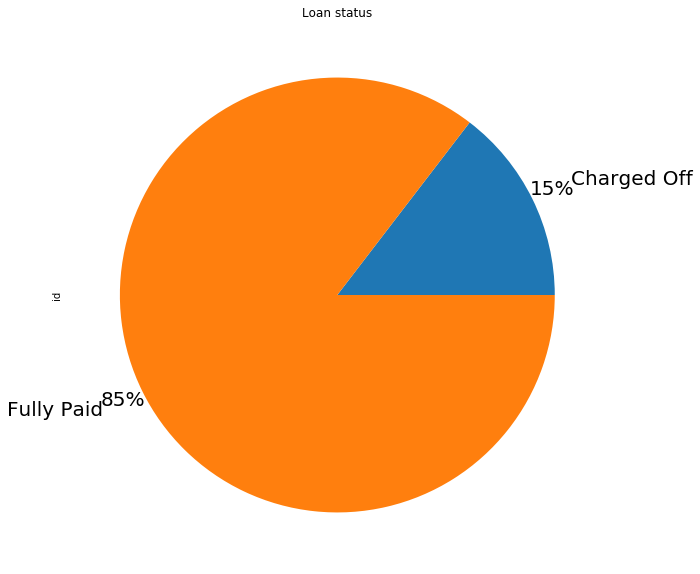

In [51]:
LC.groupby("loan_status").count()["id"].plot.pie(title="Loan status", fontsize=20,figsize=(15,10),autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

#### Insights
From past loan data, majority of borrowers pay the amount, we need to find the factors driving the 15% defaulters

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

- Function to have box plot with label and Mean value

In [53]:
def box_plot(df,chart_title="Chart",x_label="X",y_label="Y"):
    plt.figure(num=1,figsize=(15,7))
    chart = sns.boxplot(data=df)
    chart.set_title(chart_title,fontsize=20, color="blue")
    chart.set_xlabel(x_label, fontsize=12,color="green", weight="bold")
    chart.set_ylabel(y_label, fontsize=12,color="green", weight="bold")
    #plt.yscale="log"
    #chart.set_xticklabels(ax.get_xticklabels(),rotation=30)
    #chart.set_xticklabels(["Annual Income"],rotation=0)
    try:
        labels=df.describe().to_frame()
    except:
        labels=df.describe()
    ofset =0
    for colname in labels.columns:
        q1=labels[colname]["25%"]
        med=labels[colname]["50%"]
        q3=labels[colname]["75%"]
        iqr = q3 - q1
        mean=labels[colname]["mean"]
        #upper_whisker = df[data<=upper_quartile+1.5*iqr].max()
        #lower_whisker = data[data>=lower_quartile-1.5*iqr].min()
        plt.ylim(0,q3*2)
        fntsiz=10
        
        chart.text(0.005+ofset,q1,q1,fontsize=fntsiz)
        chart.text(0.2+ofset,q3,"IQR="+str(round(iqr,1)),fontsize=fntsiz)
        chart.text(0.005+ofset,q3,str(q3),fontsize=fntsiz)
        chart.text(0.005+ofset,med,"Median="+str(med),fontsize=fntsiz)
        chart.text(-0.2+ofset,mean,"Mean="+str(round(mean,1)),fontsize=fntsiz)
        chart.axes.hlines( y = mean, color='black', linewidth=1, alpha=.7,xmin=-0.5,xmax=0.5+ofset)
        ofset=ofset+1
        
    plt.show()

- Box plot to compare annual income and loan amount

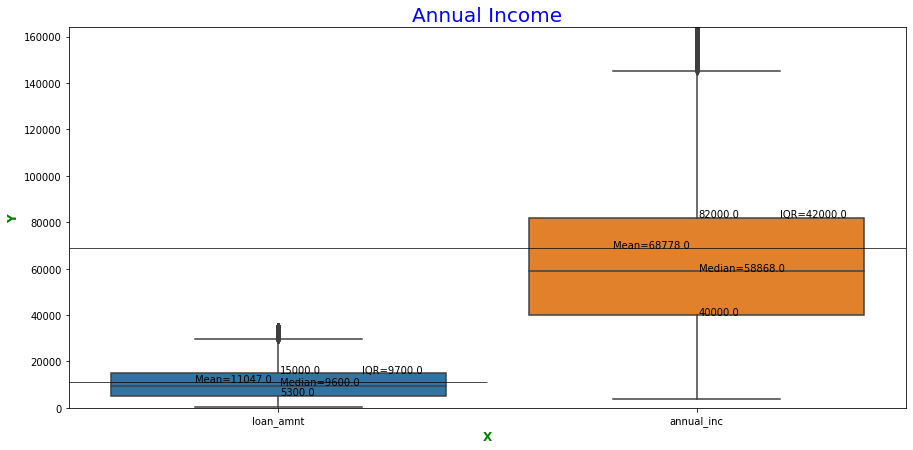

In [54]:
box_plot(LC[["loan_amnt","annual_inc"]],"Annual Income")

- Functions for bar plots

In [55]:
def plot_id(fign, df, xval,yval, title, xtitle, ytitle, rotation):
    plt.figure(num=fign, figsize=(15,7))
    plot1 = sns.barplot(x=xval, y=yval, data=df)
    plot1.set_title(title,fontsize=20, color="blue")
    plot1.set_xlabel(xtitle, fontsize=12,color="green", weight="bold")
    plot1.set_ylabel(ytitle, fontsize=12,color="green", weight="bold")
    plot1.set_xticklabels(plot1.axes.get_xticklabels(),rotation=rotation)
    
    for index, row in df.iterrows():
        plot1.text(row.name,row.id, round(row.id,2), color='black', ha="center",
                    fontsize=14, weight="bold")
        
def plot_funded_amt(fign, df, xval,yval, title, xtitle, ytitle, yscale):
    plt.figure(num=fign, figsize=(15,7))
    plot1 = sns.barplot(x=xval, y=yval, data=df)
    plot1.set_title(title,fontsize=20, color="blue")
    plot1.set_xlabel(xtitle, fontsize=12,color="green", weight="bold")
    plot1.set_ylabel(ytitle, fontsize=12,color="green", weight="bold")
    for index, row in df.iterrows():
        plot1.text(row.name,row.funded_amnt_inv, round(row.funded_amnt_inv,2), color='black', ha="center",
                    fontsize=14, weight="bold")

def plot_target(fign, df, xval,yval, title, xtitle, ytitle, rotation):
    plt.figure(num=fign, figsize=(15,7))
    plot1 = sns.barplot(x=xval, y=yval, data=df)
    plot1.set_title(title,fontsize=20, color="blue")
    plot1.set_xlabel(xtitle, fontsize=12,color="green", weight="bold")
    plot1.set_ylabel(ytitle, fontsize=12,color="green", weight="bold")
    plot1.set_xticklabels(plot1.axes.get_xticklabels(),rotation=rotation)
    
    for index, row in df.iterrows():
        plot1.text(row.name,row.target_col, round(row.target_col,2), color='black', ha="center",
                    fontsize=14, weight="bold")

- Plot loan grade distribution

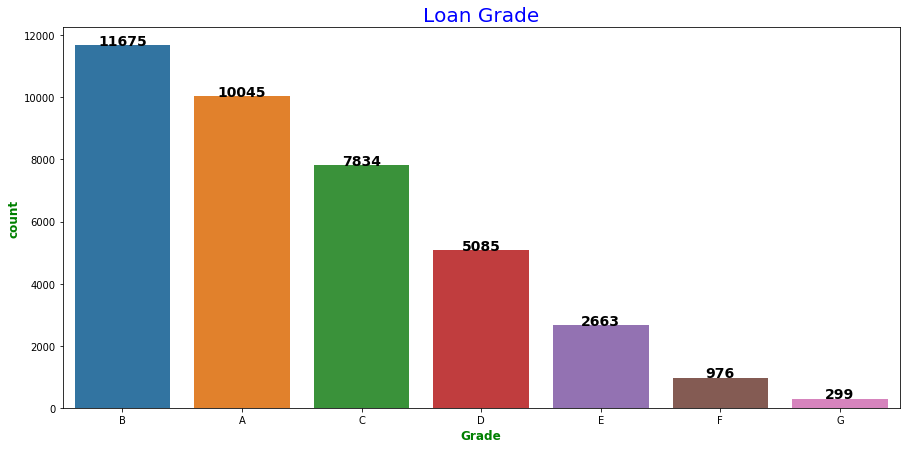

In [56]:
grade=LC.groupby("grade").count().sort_values(by="id",ascending=False).reset_index()
plot_id(2,grade,"grade","id","Loan Grade","Grade","count",0)

- Plot loan purpose distribution

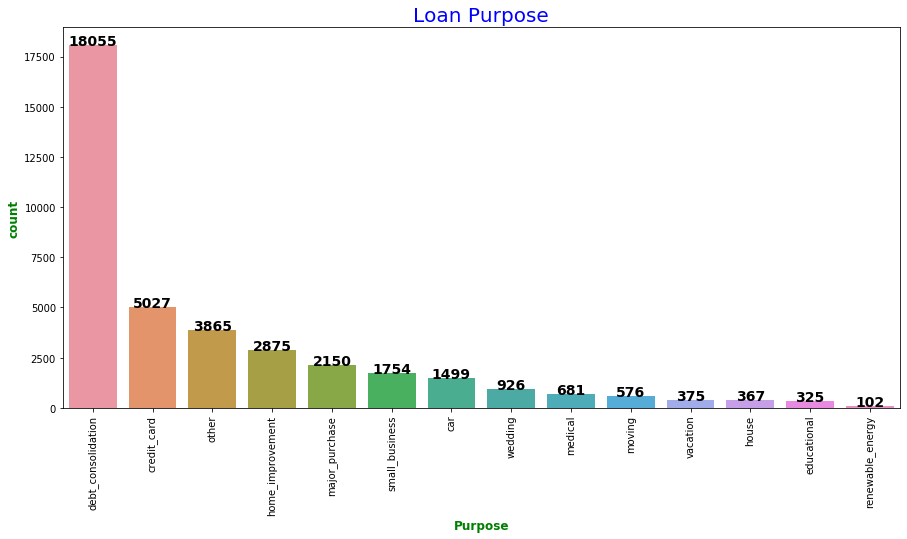

In [57]:
purpose=LC.groupby("purpose").count().sort_values(by="id",ascending=False).reset_index()
plot_id(2,purpose,"purpose","id","Loan Purpose","Purpose","count",90)

- Try a direct correlation matrix to see if any of the parameters we have got a direct correlation

,open_acc,dti,annual_inc,delinq_2yrs,funded_amnt_inv,installment,int_rate,emp_length
open_acc,1.000000,0.289675,0.152728,0.027138,0.146338,0.167015,-0.029447,0.053680
dti,0.289675,1.000000,-0.158532,-0.001419,0.036010,0.026118,0.078824,0.011399
annual_inc,0.152728,-0.158532,1.000000,0.011408,0.314027,0.340905,0.104846,0.148110
delinq_2yrs,0.027138,-0.001419,0.011408,1.000000,-0.046110,-0.039326,0.126188,0.012432
funded_amnt_inv,0.146338,0.036010,0.314027,-0.046110,1.000000,0.894906,0.407729,0.157908
installment,0.167015,0.026118,0.340905,-0.039326,0.894906,1.000000,0.359086,0.135132
int_rate,-0.029447,0.078824,0.104846,0.126188,0.407729,0.359086,1.000000,0.041230
emp_length,0.053680,0.011399,0.148110,0.012432,0.157908,0.135132,0.041230,1.000000


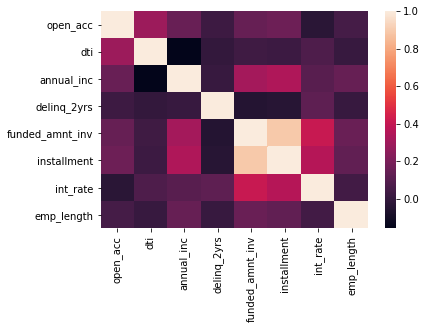

In [58]:
corlc=LC.loc[LC["delinq_2yrs"]!=0]
corrdf=corlc[["open_acc","dti","annual_inc","delinq_2yrs","funded_amnt_inv","installment","int_rate","emp_length"]].corr()
sns.heatmap(data=corrdf)
corrdf

- Plot interest rates for different loan purposes

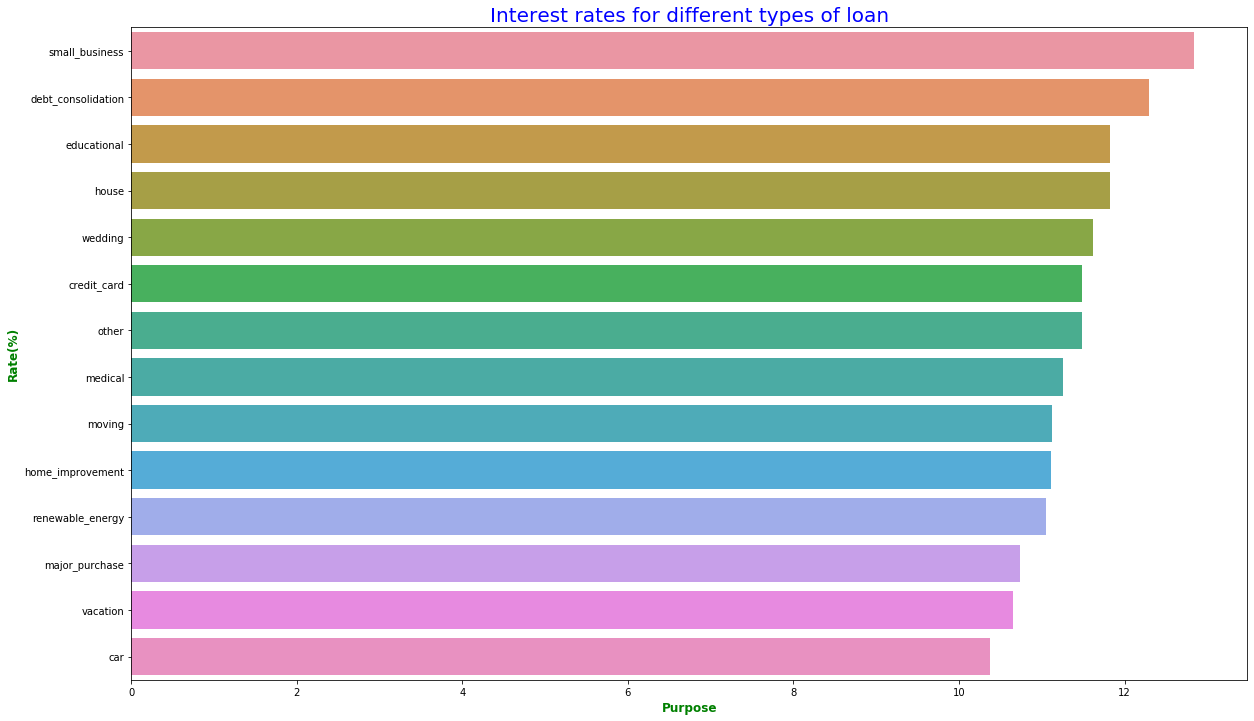

In [59]:
def plot_intrate(fign, df, xval,yval, title, xtitle, ytitle, yscale):
    plt.figure(num=fign, figsize=(20,12))
    plot1 = sns.barplot(x=xval, y=yval, data=df)
    plot1.set_title(title,fontsize=20, color="blue")
    plot1.set_xlabel(xtitle, fontsize=12,color="green", weight="bold")
    plot1.set_ylabel(ytitle, fontsize=12,color="green", weight="bold")
    
    plt.show()
    
purp_rate=LC.groupby("purpose").median().reset_index()
purp_rate=purp_rate.loc[:,["purpose","int_rate"]].sort_values(by="int_rate",ascending=False).reset_index()

plot_intrate(2,purp_rate,"int_rate","purpose","Interest rates for different types of loan","Purpose","Rate(%)",False)


#### Insights
This plot gives us an idea of the risk level associated with the loan purpose. Higher the interest rate could mean we assume a higher risk for that purpose

##### Define functions for segment analysis and plotting


In [60]:
def plot_status(fign, pdf, xval,yval, title, xtitle, ytitle, rotation, hue):
    plt.figure(num=fign, figsize=(20,12))
    
    # Order is enforced only if hue is not specified 
    if hue is None:
        plot1 = sns.barplot(x=xval, y=yval, data=pdf,order=pdf[xval])
    else:
        plot1 = sns.barplot(x=xval, y=yval, data=pdf, hue=hue)
    
    # Set titles, axis labels and rotate x axis labels if needed
    plot1.set_title(title,fontsize=20, color="blue")
    plot1.set_xlabel(xtitle, fontsize=12,color="green", weight="bold")
    plot1.set_ylabel(ytitle, fontsize=12,color="green", weight="bold")
    plot1.set_xticklabels(plot1.axes.get_xticklabels(),rotation=rotation)
    
    # Annotate only when there is no further drilldown, otherwise it becomes too messy
    if hue is None:
        for index, row in pdf.iterrows():
            plot1.text(row.name,row.status, round(row.status,2), color='black', ha="center",
                    fontsize=14, weight="bold")
    plt.show()

In [61]:

def seg_loan_status(df,factor,factor_desc=None,title=None, hue=None, rotation=0,topn=0,filterpct=5,filterfld="id"): 
    
    # Filter out data that is not significant
    filter_df=df.groupby(factor).count().reset_index()
    filter_df=filter_df.loc[filter_df[filterfld]>len(df)*filterpct/100]
    df=df.loc[df[factor].isin(filter_df[factor])]
    
    # Create the target value for the given group of factors
    if hue is None:
        plotdf = df.groupby(factor).mean().reset_index().loc[:,[factor,"status"]]
    else:
        plotdf = df.groupby([factor,hue]).mean().reset_index().loc[:,[factor,hue,"status"]]
        
    # Round off for better labelling
    plotdf["status"]=round(plotdf["status"]*100,1)
    
    # Sort the dataframe if there is further drill down
    if hue is None:
        if (topn!=0):
            plotdf=plotdf.sort_values(by="status",ascending=False).head(topn).reset_index(drop=True)
        else:
            plotdf=plotdf.sort_values(by="status",ascending=False).reset_index(drop=True)
    
    # Generate Plot
    plot_status(1,plotdf,factor,"status",str(title or factor),\
                 str(factor_desc or factor),"Charge Off probability (%)",rotation, hue)



- Defaulter distribution with Years of work expereience 

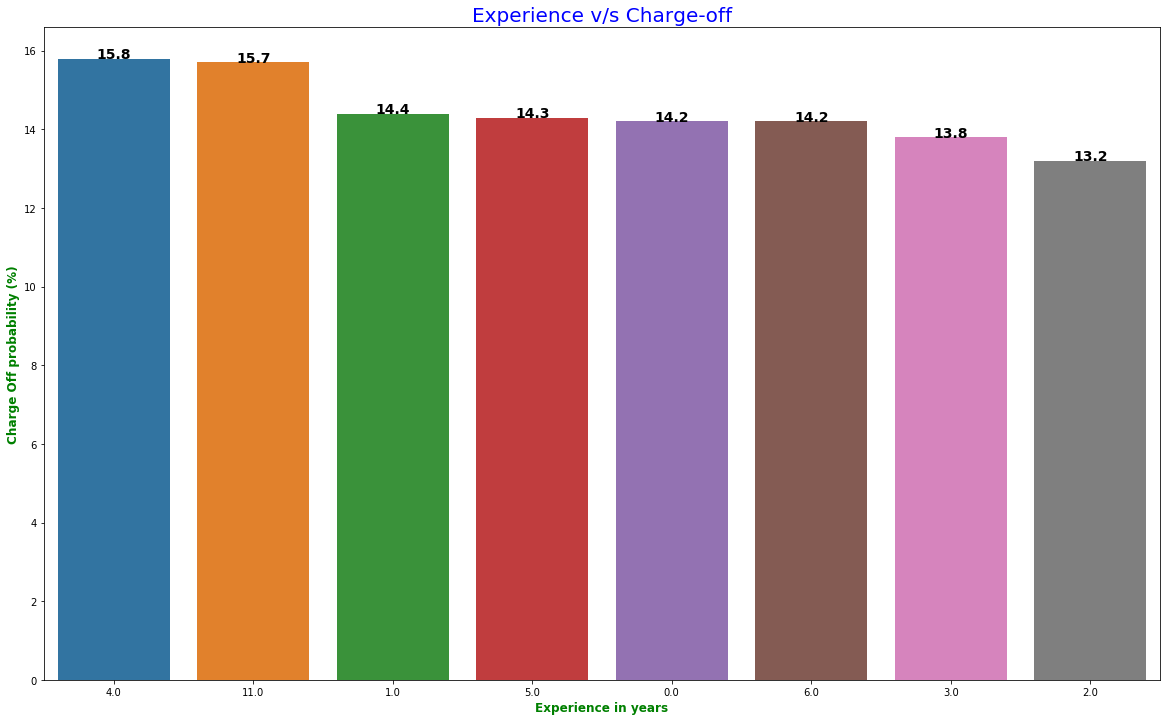

In [62]:
seg_loan_status(df=LC,factor="emp_length",factor_desc="Experience in years", title="Experience v/s Charge-off")

#### See if there is a pattern with home ownership and the state they're from

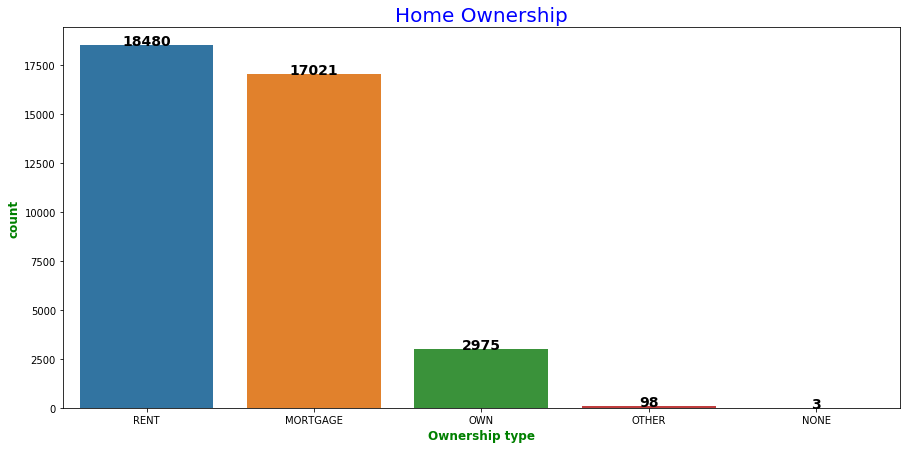

In [63]:
home=LC.groupby("home_ownership").count().sort_values(by="id",ascending=False).reset_index()
plot_id(2,home,"home_ownership","id","Home Ownership","Ownership type","count",0)
#sns.barplot(x="home_ownership",y="status",data=LC)

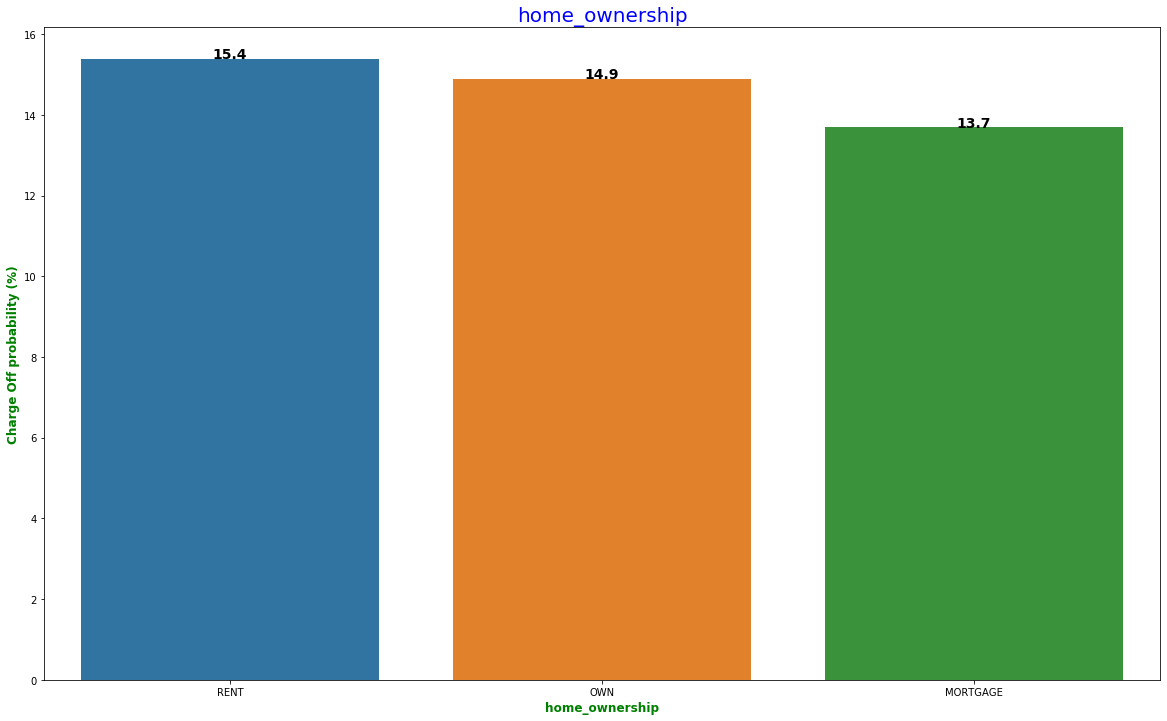

In [64]:
seg_loan_status(df=LC,factor="home_ownership")

#### Insights
- Most the borrowers are having Mortgage or rental homes as opposed to own home
- People with rental homes seem to be defaulting slightly more than people with mortgage or own homes.

Let's have a look at state-wise distribution

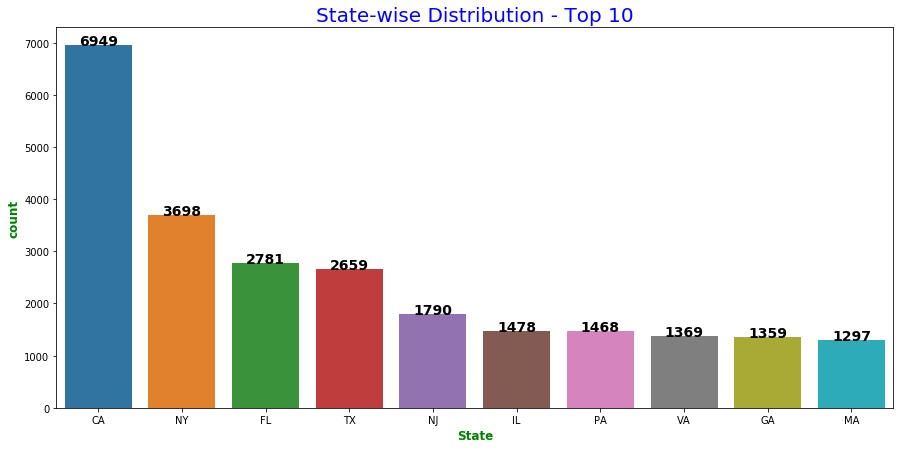

In [65]:
state=LC.groupby("addr_state").count().sort_values(by="id",ascending=False).reset_index()[:10]
plot_id(2,state,"addr_state","id","State-wise Distribution - Top 10","State","count",0)

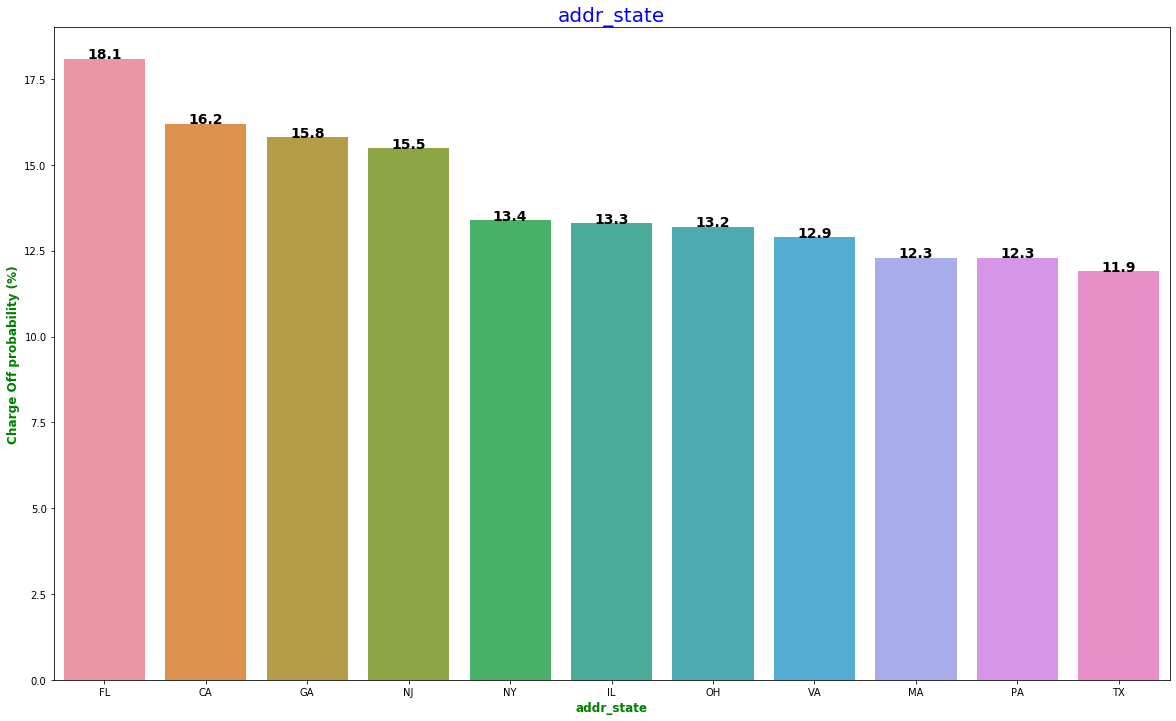

In [66]:
seg_loan_status(df=LC,factor="addr_state",topn=15,filterpct=3)

#### Insights
- Though majority of borrowers are from CA, FL, NY & TX, the number of defaulters doesn't follow the same order.
- FL seem to have highest number of defaulters, though CA follows it immediately. NY & TX have much lower defaulters. 
<br>There seem to be a higher risk in FL state considering it is second in number of borrowers

- Let's try to see the two largest segments of home ownership across states - rent & mortgage

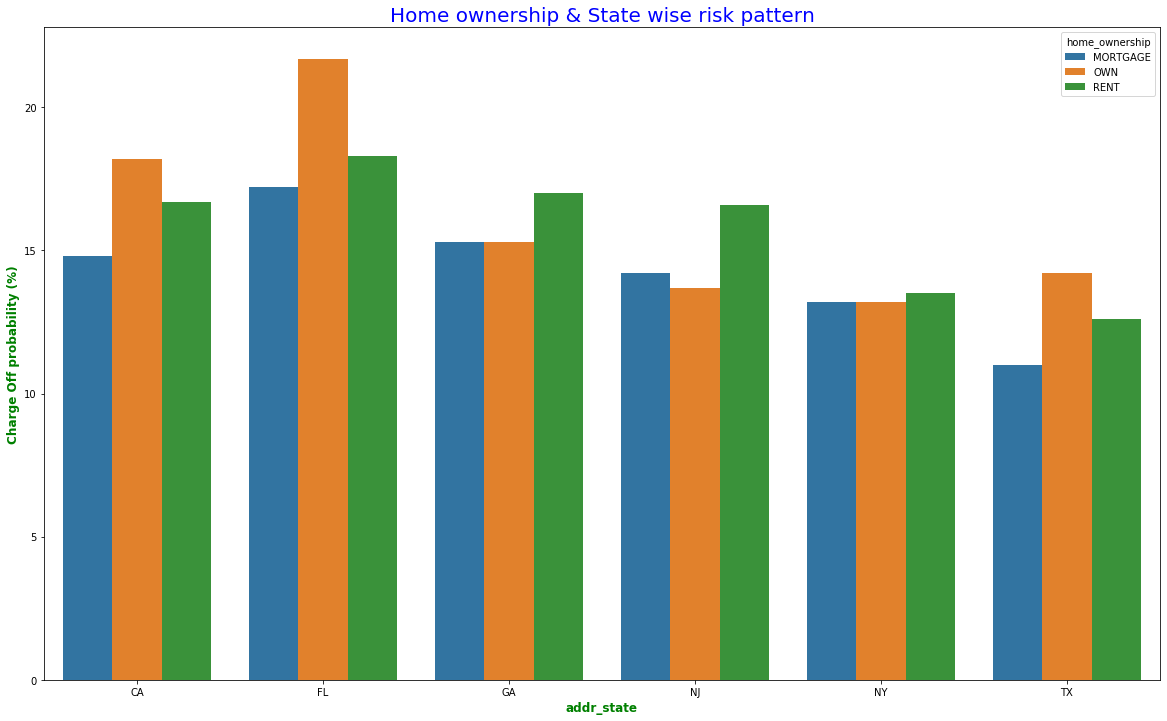

In [67]:
home_state=LC.loc[LC["addr_state"].isin(["FL","CA","GA","NJ","NY","TX"])].loc[LC["home_ownership"].\
                                                                   isin(["RENT","MORTGAGE","OWN"])]
seg_loan_status(df=home_state,factor="addr_state",hue="home_ownership",title="Home ownership & State wise risk pattern")

#### Insights
- When we further drilldown to home onwership in these states,it is consistently showing borrowers with rented home is a higher risk category
- In CA, FL & TX we see borrowers with OWN homes show a higher risk. This is counter intuitive, and need further investigation

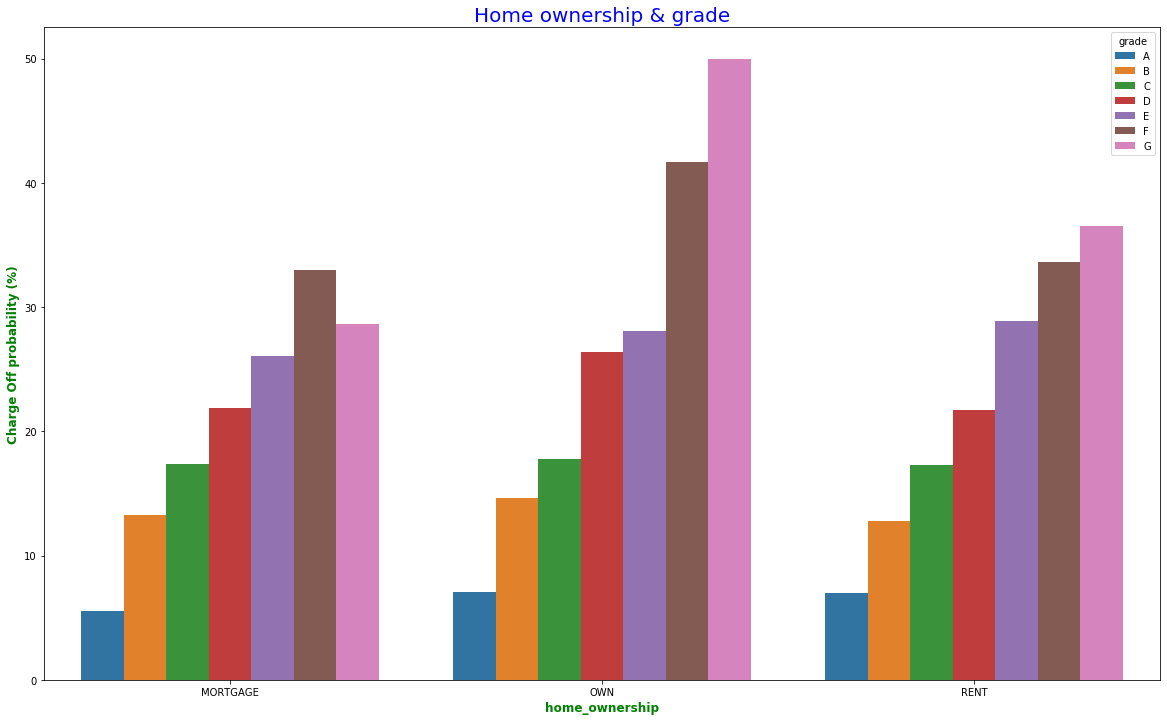

In [68]:
seg_loan_status(df=home_state,factor="home_ownership",hue="grade",title="Home ownership & grade")

#### Insights
- Further drill down indicate borrowers with own house and a lower credit grade are defaulting a lot more than other two

<B> Now let us take a look at loan term & purpose

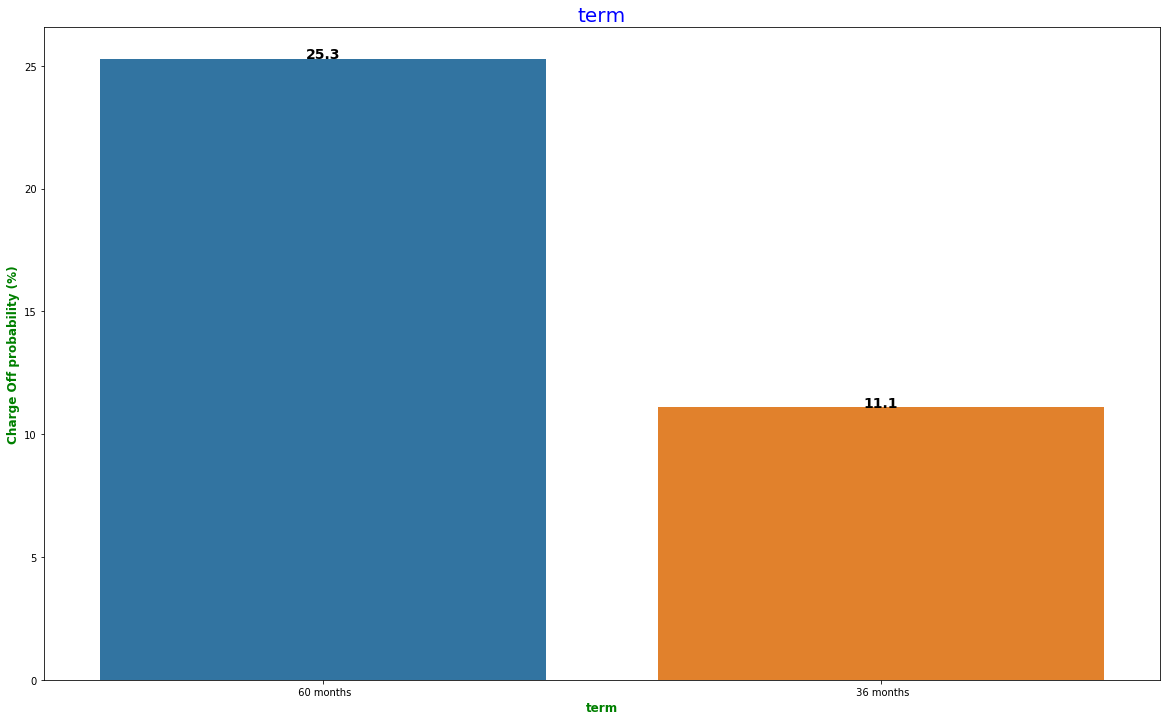

In [69]:
seg_loan_status(df=LC,factor="term")

#### Insights
- Longer term loans have more defaulters

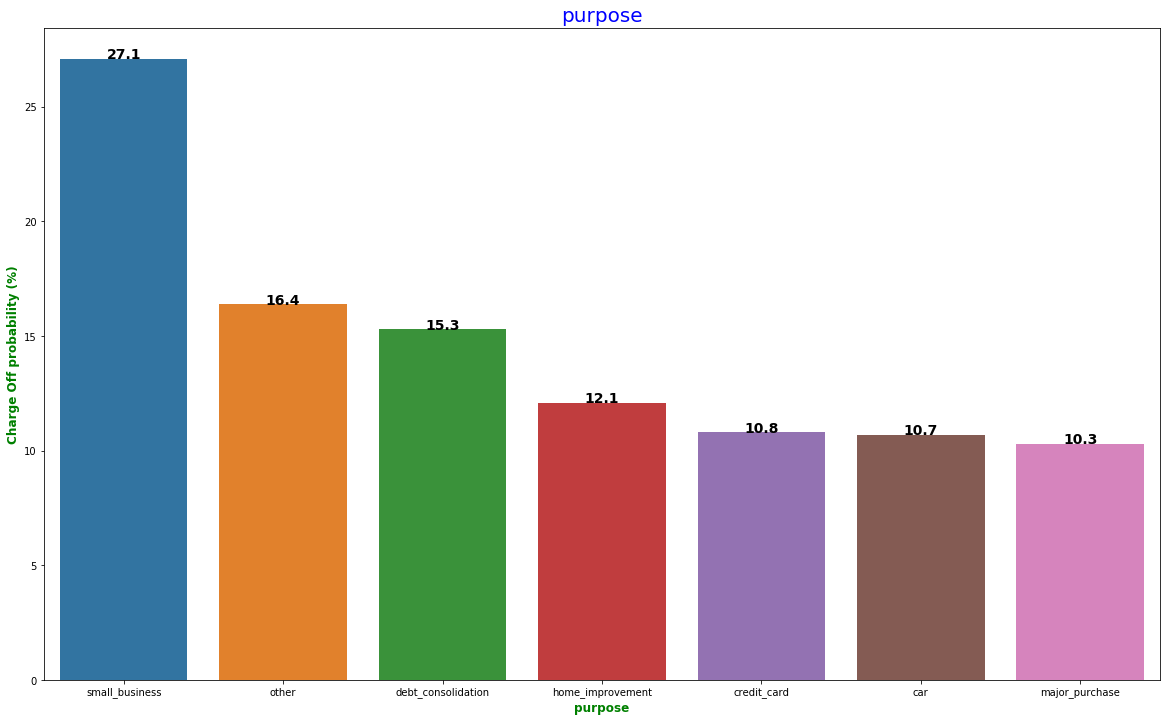

In [70]:
seg_loan_status(df=LC,factor="purpose",topn=25,filterpct=3)

#### Insights
- Loans borrowed for small business has significanty higher risk compared to others.

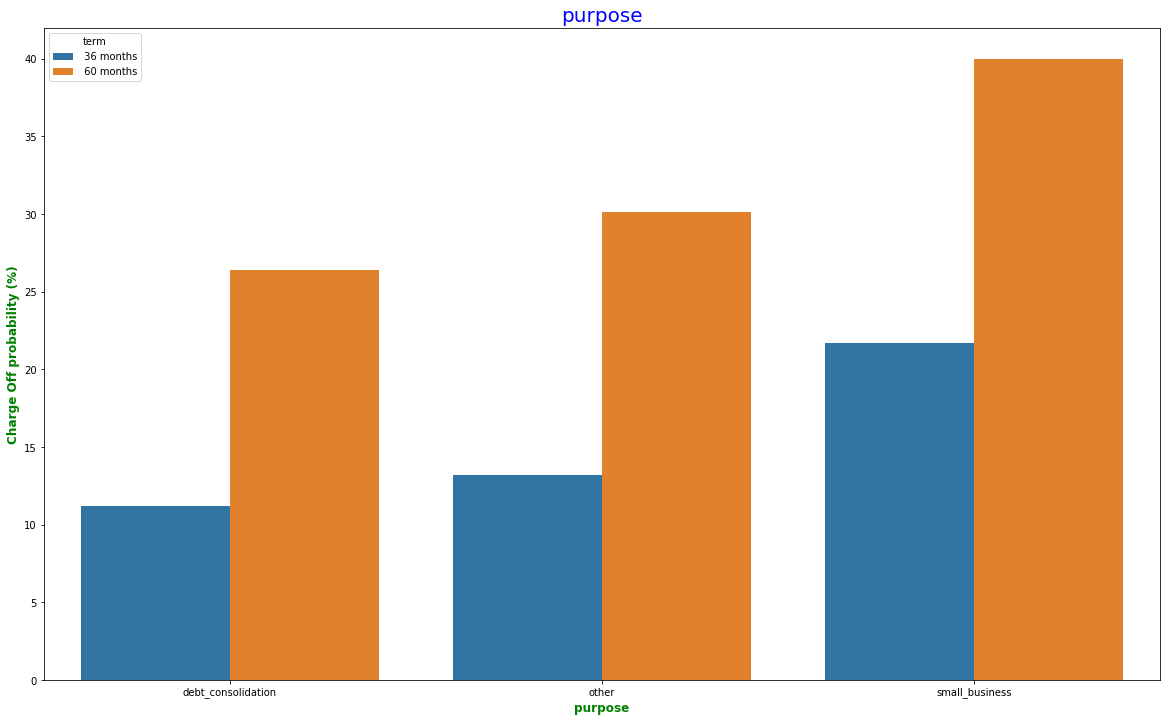

In [71]:
purpose_term=LC.loc[LC["purpose"].isin(["small_business","other","debt_consolidation"])]
seg_loan_status(df=purpose_term,factor="purpose",hue="term")

#### Insights
- Longer term loans have much higher risk regardless of what purpose they are taken for

In [72]:
LC["funded_amnt_inv"].describe()


count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

- Categorize funded amount using the buckets seen from the ranges above

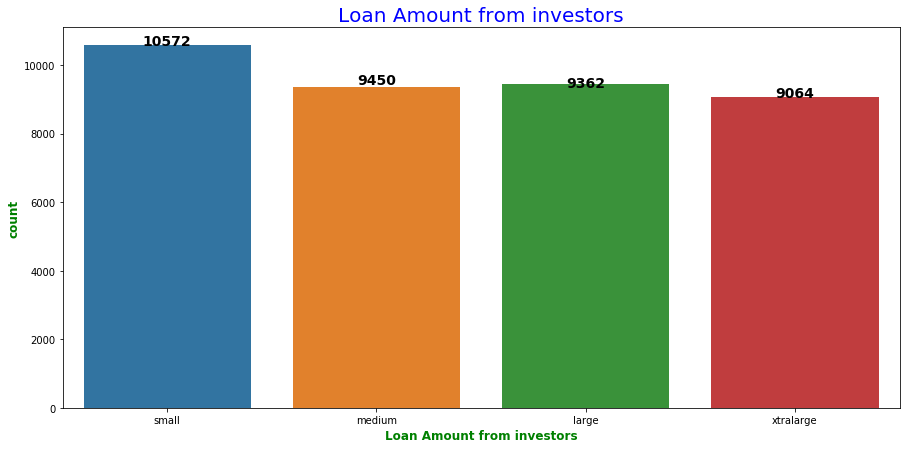

In [73]:
LC["loan_size"]=pd.cut(LC["funded_amnt_inv"],[0,5000,9000,14500,35000],labels=["small","medium","large","xtralarge"])
loansize=LC.groupby("loan_size").count().sort_values(by="id",ascending=False).reset_index()
plot_id(2,loansize,"loan_size","id","Loan Amount from investors","Loan Amount from investors","count",0)

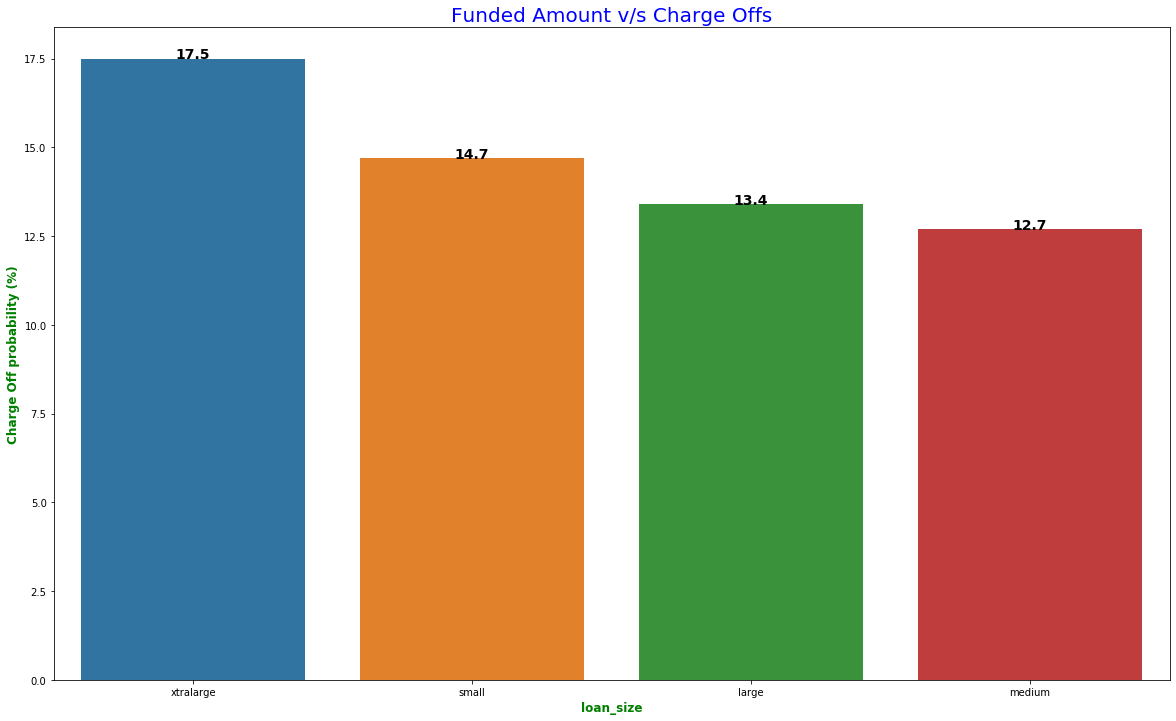

In [74]:
seg_loan_status(df=LC,factor="loan_size",filterpct=3, title="Funded Amount v/s Charge Offs")

#### Insights
- Xtra large & small buckets see higher chance of defaulters than midsized loans

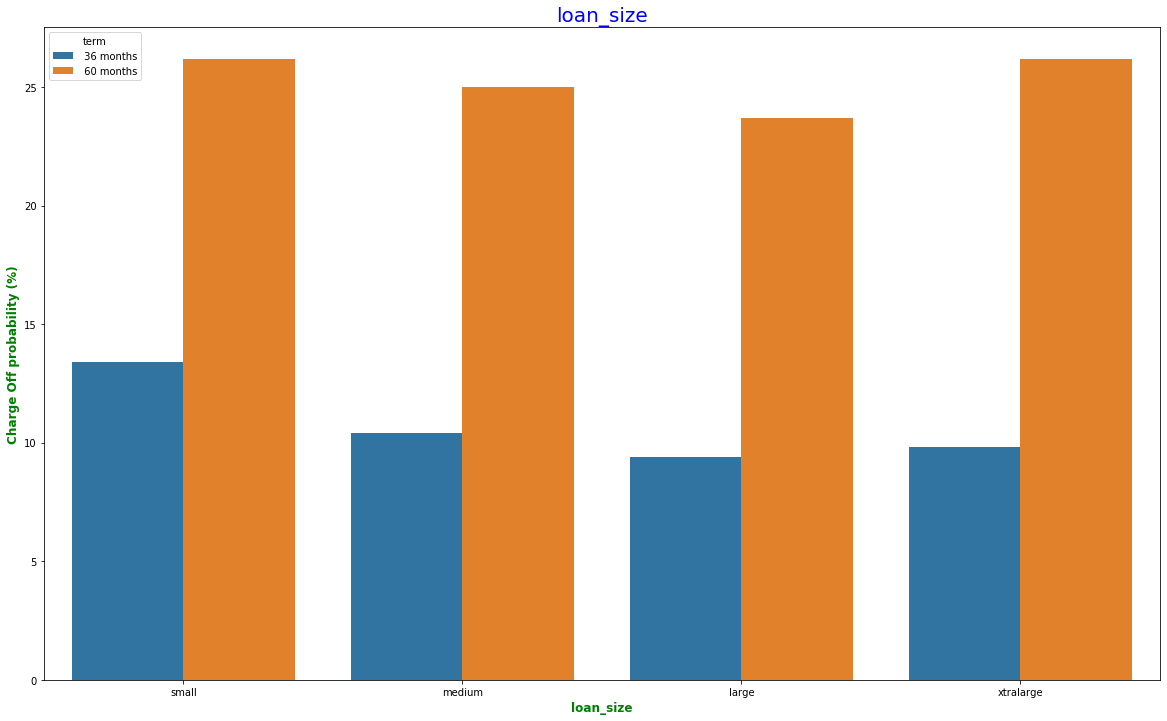

In [75]:
seg_loan_status(df=LC,factor="loan_size",hue="term")

#### Insights
- Long term loans have higher chance of default across all loan sizes

- Combine all "verified" borrowers to one bucket and plot against charge offs

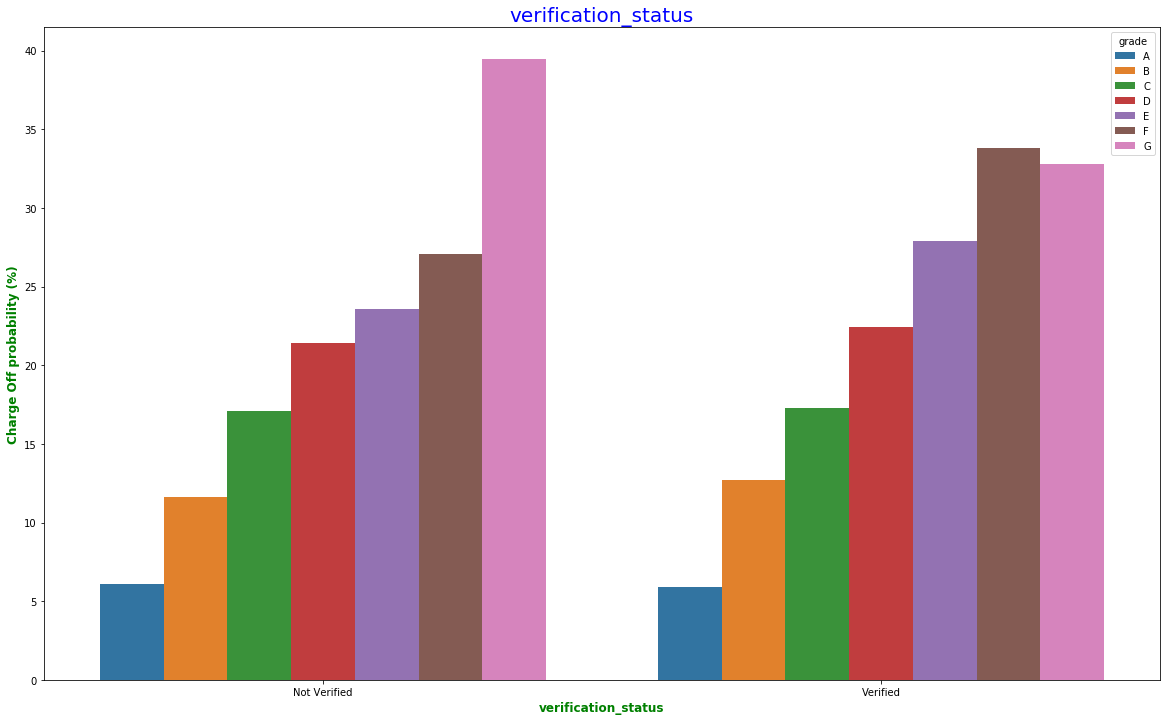

In [76]:
LC.loc[LC["verification_status"].isin(["Source Verified","Verified"]),"verification_status"]="Verified"
seg_loan_status(df=LC,factor="verification_status",hue="grade",filterpct=3)

#### Insights
For cases not verified we see a higher probability of charge off

- Convert DTI to different buckets using the quartile ranges 

In [77]:
LC["dti"].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [78]:
LC["dti_categ"]=pd.cut(LC["dti"],[0,8.14,13.38,18.57,30],labels=["small","medium","large","xtralarge"])

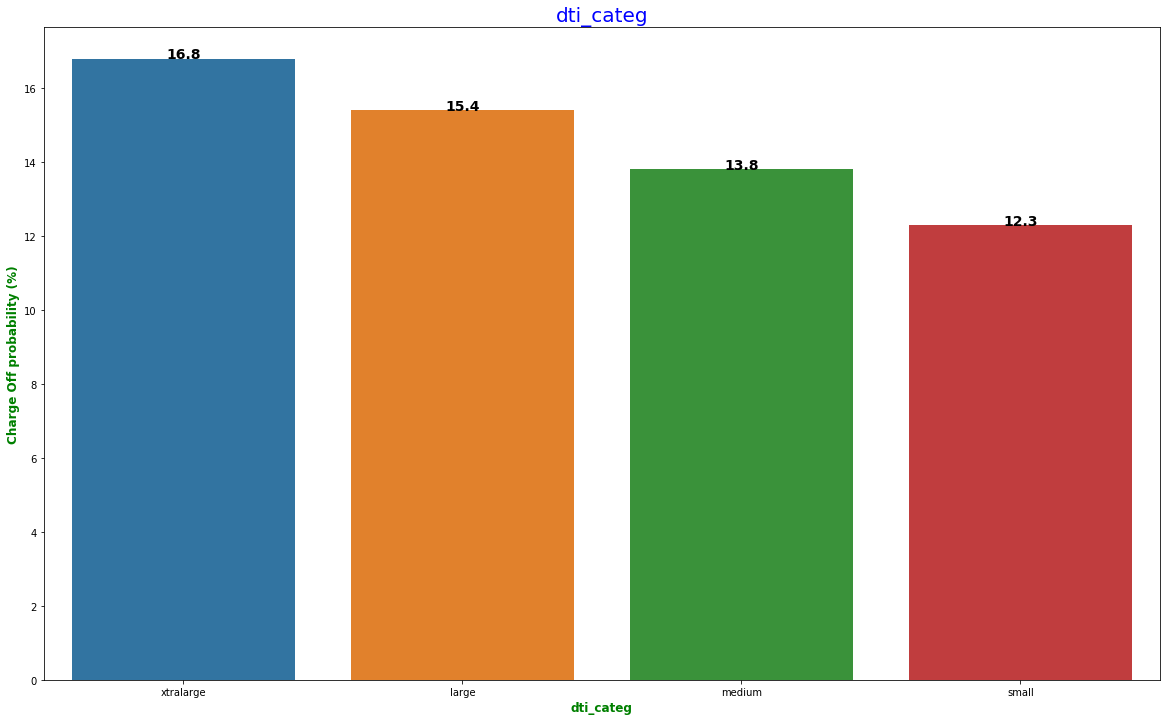

In [79]:
seg_loan_status(df=LC,factor="dti_categ",filterpct=3)